In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests

In [3]:
url = "https://raw.githubusercontent.com/nityaranjan22/India---Air-Quality-Analysis/master/dataset.csv"
df = pd.read_csv(url, low_memory = False)

In [4]:
print(df.describe())

                 so2            no2           rspm            spm        pm2_5
count  401096.000000  419509.000000  395520.000000  198355.000000  9314.000000
mean       10.829414      25.809623     108.832784     220.783480    40.791467
std        11.177187      18.503086      74.872430     151.395457    30.832525
min         0.000000       0.000000       0.000000       0.000000     3.000000
25%         5.000000      14.000000      56.000000     111.000000    24.000000
50%         8.000000      22.000000      90.000000     187.000000    32.000000
75%        13.700000      32.200000     142.000000     296.000000    46.000000
max       909.000000     876.000000    6307.033333    3380.000000   504.000000


In [5]:
print(df.columns)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [6]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

In [7]:
df.dropna(axis = 0, subset = ['type'])
df = df.dropna(axis = 0, subset = ['location'])
df = df.dropna(axis = 0, subset = ['so2'])

df.drop_duplicates()

df.isnull().sum()

stn_code                       119813
sampling_date                       0
state                               0
location                            0
agency                         125169
type                             4935
so2                                 0
no2                              1999
rspm                            34377
spm                            228716
location_monitoring_station     25502
pm2_5                          391901
date                                4
dtype: int64

In [8]:
df.drop(['stn_code'], inplace = True, axis = 1)
df.drop(['agency'], inplace = True,axis = 1)
df.drop(['location_monitoring_station'], inplace = True, axis = 1)
df.drop(['sampling_date'], inplace = True,axis = 1)

In [9]:
print(df.head)
df.to_csv("clean.csv")

print(df['type'].value_counts())

cities_ap = df['location'][df['state']=='Andhra Pradesh']
print(cities_ap.value_counts())

<bound method NDFrame.head of                  state   location                                type   so2  \
0       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   4.8   
1       Andhra Pradesh  Hyderabad                     Industrial Area   3.1   
2       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.2   
3       Andhra Pradesh  Hyderabad  Residential, Rural and other Areas   6.3   
4       Andhra Pradesh  Hyderabad                     Industrial Area   4.7   
...                ...        ...                                 ...   ...   
435734     West Bengal   ULUBERIA                               RIRUO  20.0   
435735     West Bengal   ULUBERIA                               RIRUO  17.0   
435736     West Bengal   ULUBERIA                               RIRUO  18.0   
435737     West Bengal   ULUBERIA                               RIRUO  22.0   
435738     West Bengal   ULUBERIA                               RIRUO  20.0   

         no2   rspm  

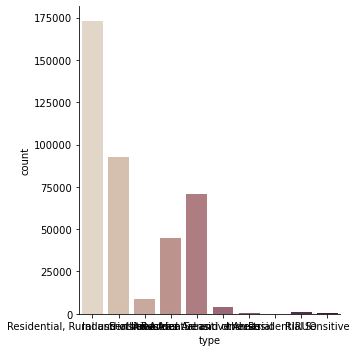

In [10]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

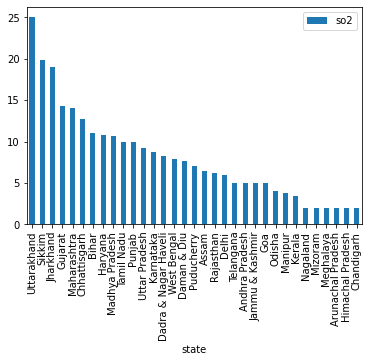

In [11]:
#bar plot of so2 vs state - desc order
df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar()

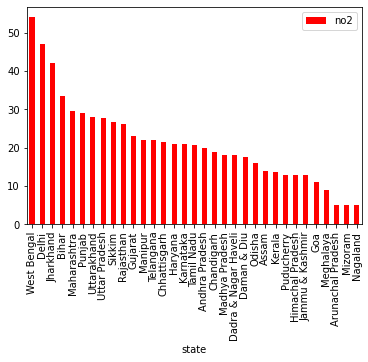

In [12]:
# bar plot of no2 vs state - desc order
df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(color = 'r')

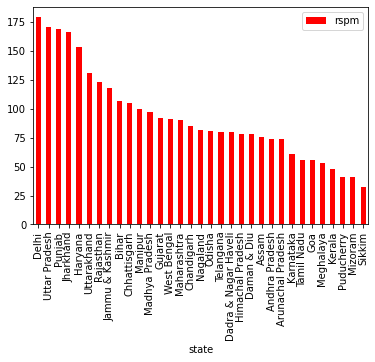

In [13]:
# rspm = PM10
df[['rspm', 'state']].groupby(['state']).median().sort_values("rspm", ascending = False).plot.bar(color = 'r')


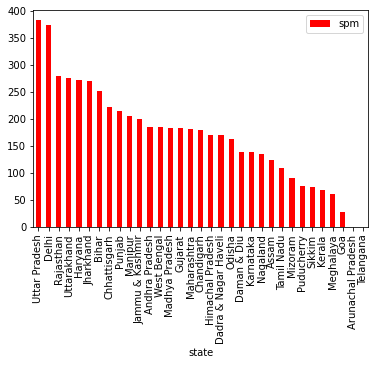

In [14]:
# spm
df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(color = 'r')

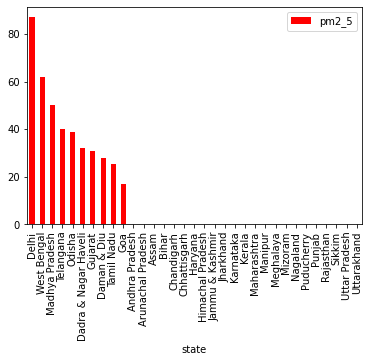

In [15]:
# pm2_5
df[['pm2_5', 'state']].groupby(['state']).median().sort_values("pm2_5", ascending = False).plot.bar(color = 'r')

C:\Users\NityaRanjan\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


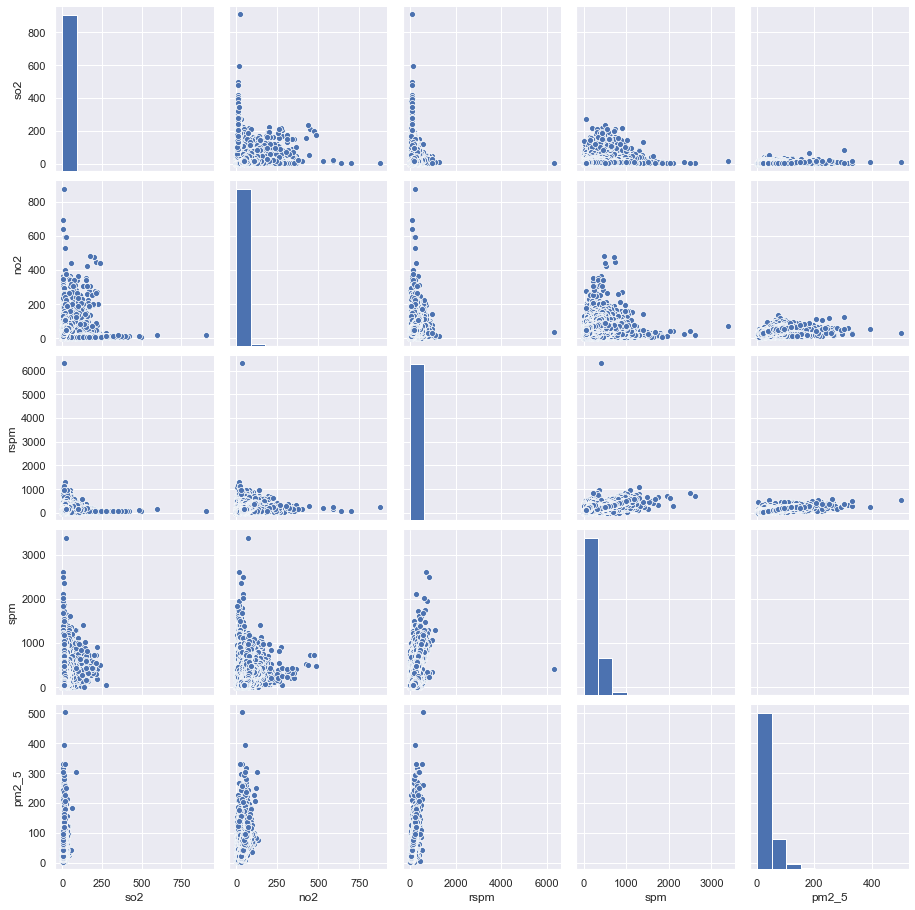

In [16]:
#Scatter plots of all columns
sns.set()
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [17]:
#taking only Delhi data
df_delhi = df[df['location'] == 'Delhi']

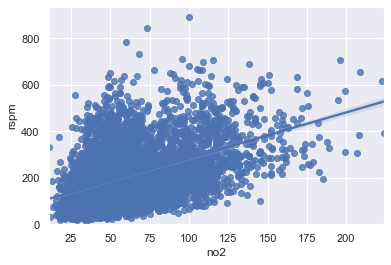

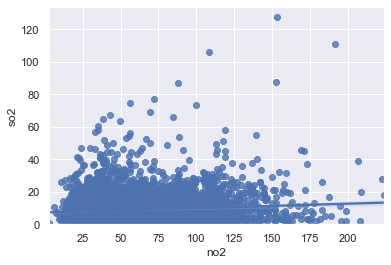

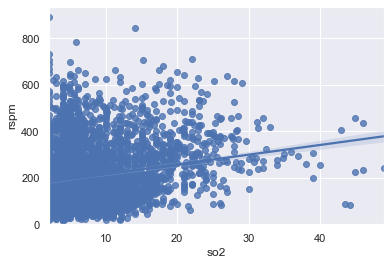

In [18]:
# showing the relationship between no2 vs rspm (hardly increasing correlation)
sns.regplot(x = 'no2', y = 'rspm', data = df_delhi)
plt.ylim(0,)
plt.show()

#Relationship between no2 vs so2 (increasing correlation)
sns.regplot(x = 'no2', y = 'so2',data = df_delhi)
plt.ylim(0,)
plt.show()

#Relationship between so2 vs rspm (hardly increasing correlation)
sns.regplot(x = 'so2', y = 'rspm',data = df_delhi)
plt.ylim(0,)
plt.show()

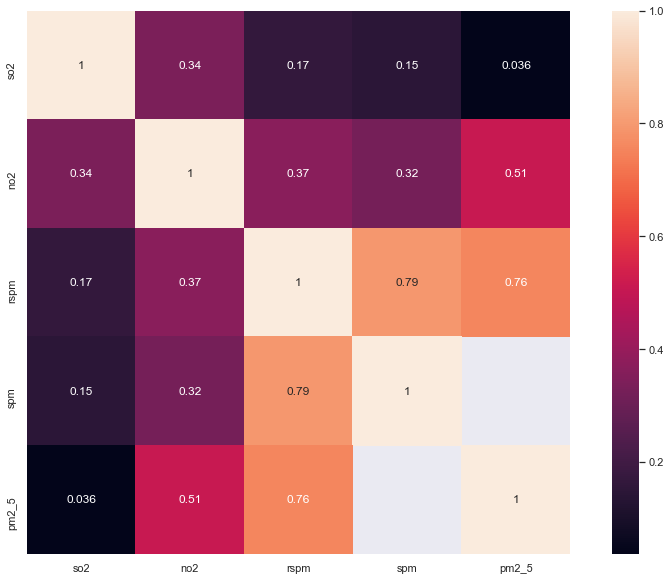

In [19]:
#Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(corrmat, vmax = 1, square = True, annot = True)


In [20]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

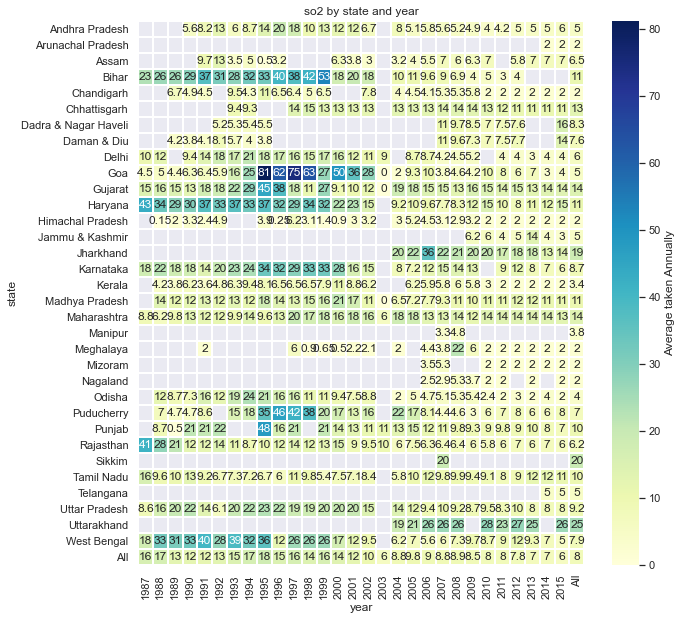

In [21]:
# Heatmap Pivot with State as Row, Year as Col, No2 as Value
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('so2'))
sns.heatmap(df.pivot_table('so2', index = 'state',
                columns = ['year'], aggfunc = 'median', margins=True),
                annot = True, cmap = 'YlGnBu', linewidths = 1, ax = ax, cbar_kws = {'label': 'Average taken Annually'})

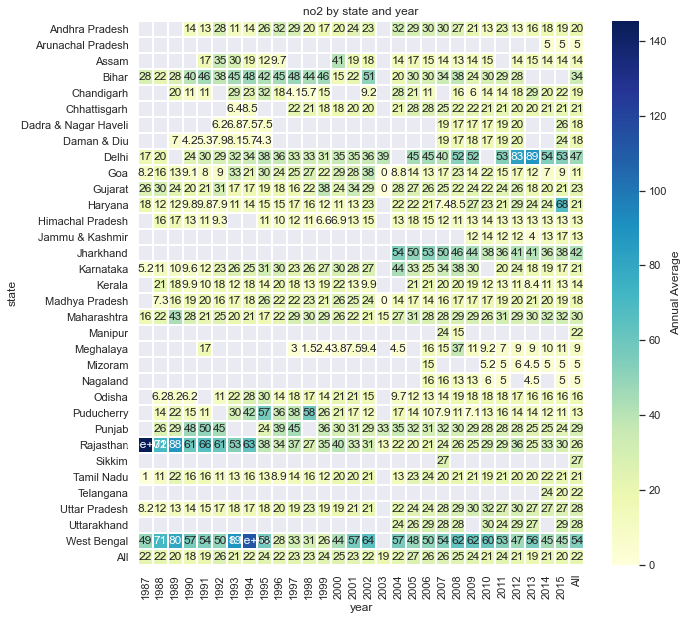

In [22]:
# Heatmap Pivot with State as Row, Year as Col, So2 as Value
f, ax = plt.subplots(figsize=(10,10))
ax.set_title('{} by state and year'.format('no2'))
sns.heatmap(df.pivot_table('no2', index='state',
                columns=['year'],aggfunc='median',margins=True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax,cbar_kws = {'label': 'Annual Average'})

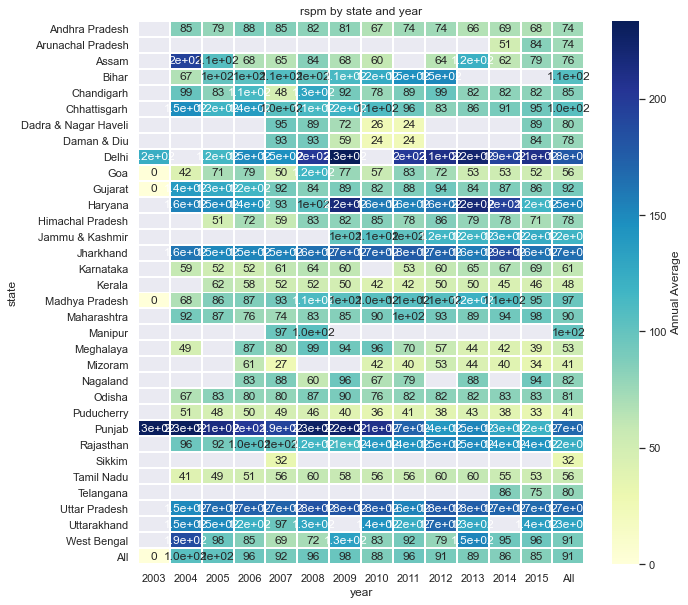

In [23]:
# heatmap of rspm
f, ax = plt.subplots(figsize = (10,10))
ax.set_title('{} by state and year'.format('rspm'))
sns.heatmap(df.pivot_table('rspm', index='state',
                columns = ['year'], aggfunc = 'median', margins = True),
                annot = True, cmap = "YlGnBu", linewidths = 1, ax = ax, cbar_kws = {'label': 'Annual Average'})

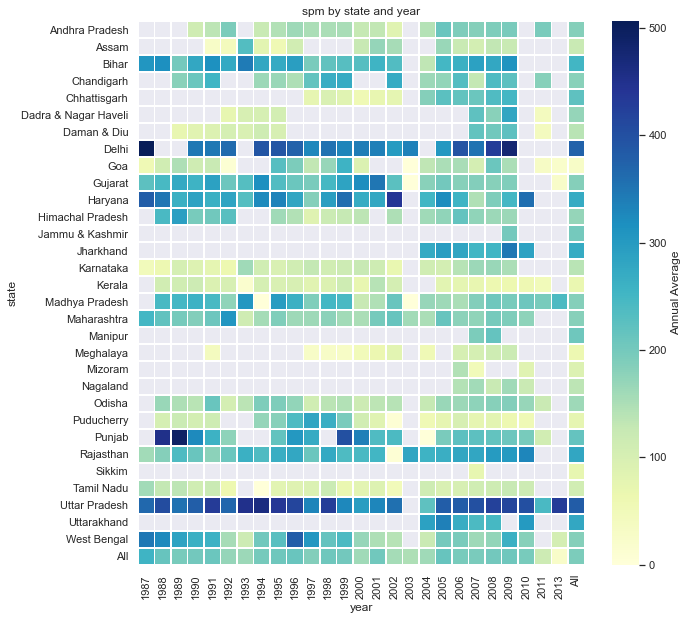

In [24]:
# heatmap of spm
f, ax = plt.subplots(figsize = (10, 10))
ax.set_title('{} by state and year'.format('spm'))
sns.heatmap(df.pivot_table('spm', index ='state',
                columns = ['year'], aggfunc = 'median', margins = True)
                , cmap = "YlGnBu", linewidths = 0.5, ax = ax, cbar_kws = {'label': 'Annual Average'})